# Introduction

An online bookstore is looking to optimize its website design to improve user engagement and ultimately increase book purchases. The website currently offers two themes for its users: “Light Theme” and “Dark Theme.” We shall conduct an A/B test on the data to determine which theme leads to better user engagement and higher conversion rates for book purchases.

# EDA

In [69]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('website_ab_test.csv')

In [8]:
df.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [10]:
df.shape

(1000, 10)

In [12]:
df.isna().sum()

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64

In [14]:
df.describe()

,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Session_Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.256048,0.253312,0.505758,50.319494,41.528000,924.999000
std,0.139265,0.139092,0.172195,16.895269,14.114334,508.231723
min,0.010767,0.010881,0.200720,20.011738,18.000000,38.000000
25%,0.140794,0.131564,0.353609,35.655167,29.000000,466.500000
50%,0.253715,0.252823,0.514049,51.130712,42.000000,931.000000
75%,0.370674,0.373040,0.648557,64.666258,54.000000,1375.250000
max,0.499989,0.498916,0.799658,79.997108,65.000000,1797.000000


In [63]:
# Grouping Data by Theme and calculating mean of metrics
df_grouped = df.groupby('Theme').mean(numeric_only=True)
df_grouped

,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Session_Duration
Theme,,,,,,
Dark Theme,0.264501,0.251282,0.512115,49.926404,41.332685,919.482490
Light Theme,0.247109,0.255459,0.499035,50.735232,41.734568,930.833333


<Axes: >

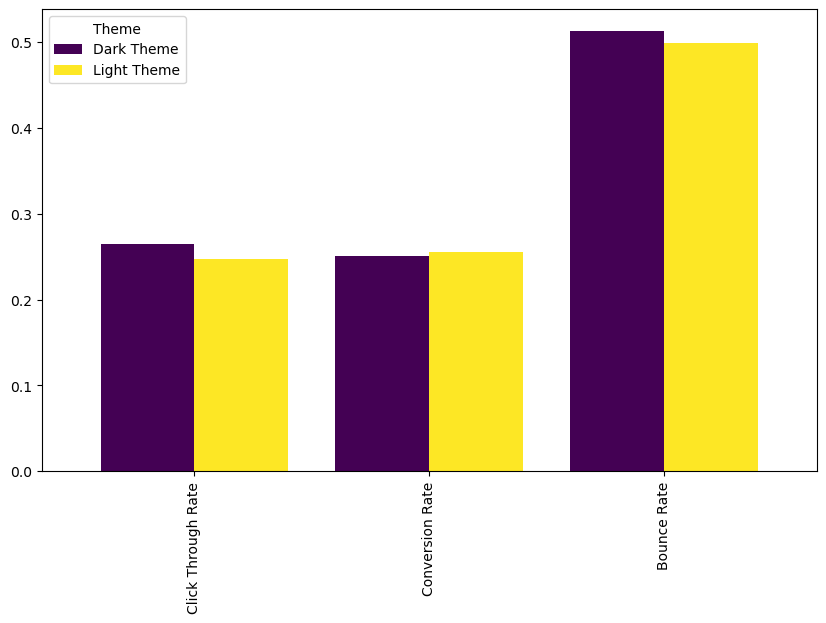

In [78]:
df_grouped[['Click Through Rate','Conversion Rate','Bounce Rate']].T.plot(kind='bar', figsize=(10, 6), colormap='viridis', width=0.8)

<Axes: >

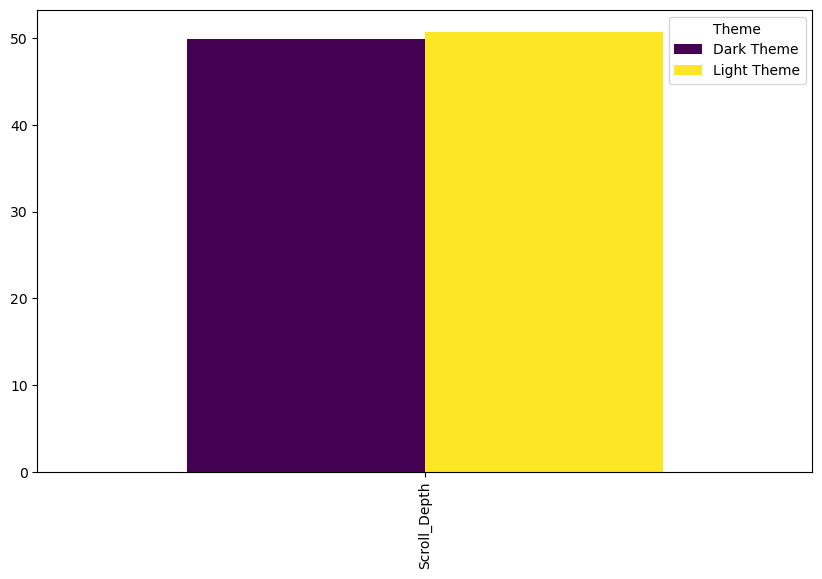

In [82]:
df_grouped[['Scroll_Depth']].T.plot(kind='bar', figsize=(10, 6), colormap='viridis', width=0.8)

<Axes: >

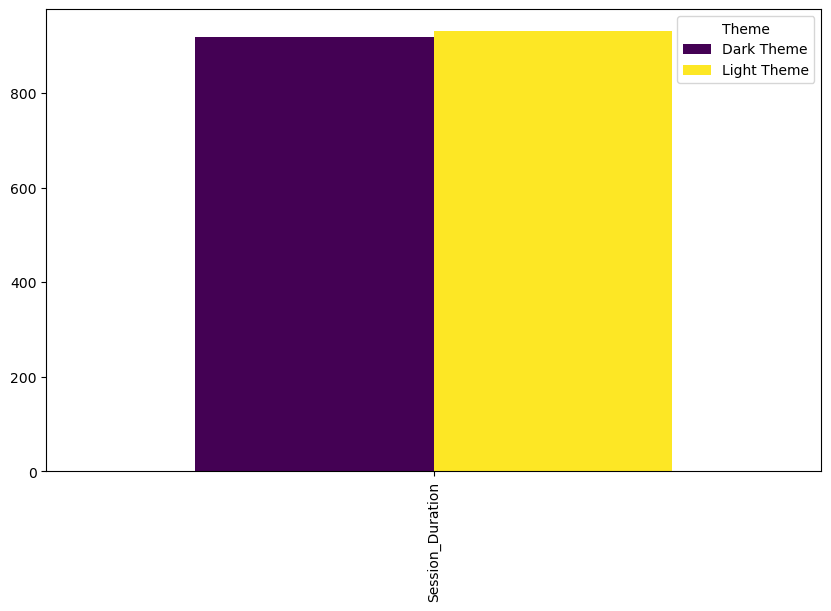

In [84]:
df_grouped[['Session_Duration']].T.plot(kind='bar', figsize=(10, 6), colormap='viridis', width=0.8)

### Click Through Rate (CTR):

Dark Theme has a slightly higher CTR (26.45%) than Light Theme (24.71%), indicating users are more likely to click on elements in the Dark Theme.

### Conversion Rate:

Light Theme leads in conversion rate (25.55%) compared to Dark Theme (25.13%), suggesting that users interacting with the Light Theme are marginally more likely to complete desired actions.

### Bounce Rate:

Dark Theme has a higher bounce rate (51.21%) than Light Theme (49.90%), meaning a larger percentage of users leave without further interaction when using the Dark Theme.

### Scroll Depth:

Users scroll slightly more in the Light Theme (50.74%) compared to the Dark Theme (49.93%), implying greater content engagement.

### Age:

The average user age is very similar for both themes, with Light Theme users being slightly older (41.73 years) compared to Dark Theme users (41.33 years).

### Session Duration:

Session duration is slightly longer for Light Theme (930.83 seconds) than Dark Theme (919.48 seconds), showing marginally higher engagement with Light Theme.

# Hypothesis Testing

We’ll use a significance level (alpha) of 0.05 and a two-sample t-test for our hypothesis testing.

### Conversion Rate

H0: There is no difference in Conversion Rates between the Light Theme and Dark Theme.\
H1: There is a difference in Conversion Rates between the Light Theme and Dark Theme.

In [35]:
# extracting conversion rates for both themes
conversion_rates_light = df[df['Theme'] == 'Light Theme']['Conversion Rate']
conversion_rates_dark = df[df['Theme'] == 'Dark Theme']['Conversion Rate']

# performing two-sample t-test
t_stat, p_value = ttest_ind(conversion_rates_light, conversion_rates_dark, equal_var=False)

t_stat, p_value

(0.4748494462782632, 0.6349982678451778)

Here our p value is 0.63 which is much greater than 0.05 and hence, we donot have enough statistical evidence to reject the null hypothesis. Therefore, we conclude that there is no statistically significant difference in Conversion Rates between the Light Theme and Dark Theme based on the data provided.

### Click Through Rate

H0: There is no difference in Click Through Rates between the Light Theme and Dark Theme.\
H1: There is a difference in Click Through Rates between the Light Theme and Dark Theme.

In [40]:
# extracting click through rates for both themes
click_through_rates_light = df[df['Theme'] == 'Light Theme']['Click Through Rate']
click_through_rates_dark = df[df['Theme'] == 'Dark Theme']['Click Through Rate']

# performing two-sample t-test
t_stat, p_value = ttest_ind(click_through_rates_light, click_through_rates_dark, equal_var=False)

t_stat, p_value

(-1.9781708664172253, 0.04818435371010704)

Here our p value is 0.048 which is less than 0.05 and hence, we have enough statistical evidence to reject the null hypothesis. Therefore, we conclude that there is a statistically significant difference in Click Through Rates between the Light Theme and Dark Theme, with the Click Through Rate of Dark Theme likely being higher

### Bounce Rate

H0: There is no difference in Bounce Rates between the Light Theme and Dark Theme.\
H1: There is a difference in Bounce Rates between the Light Theme and Dark Theme.

In [43]:
# extracting bounce rates for both themes
bounce_rates_light = df[df['Theme'] == 'Light Theme']['Bounce Rate']
bounce_rates_dark = df[df['Theme'] == 'Dark Theme']['Bounce Rate']

# performing two-sample t-test
t_stat, p_value = ttest_ind(bounce_rates_light, bounce_rates_dark, equal_var=False)

t_stat, p_value

(-1.2018883310494073, 0.229692077505148)

Here our p value is 0.22 which is greater than 0.05 and hence, we donot have enough statistical evidence to reject the null hypothesis. Therefore, we conclude that there is no statistically significant difference in Bounce Rates between the Light Theme and Dark Theme based on the data provided.

### Scroll Depth

H0: There is no difference in Scroll depth between the Light Theme and Dark Theme.\
H1: There is a difference in Scroll depth between the Light Theme and Dark Theme.

In [47]:
# extracting bounce rates for both themes
scroll_depth_light = df[df['Theme'] == 'Light Theme']['Scroll_Depth']
scroll_depth_dark = df[df['Theme'] == 'Dark Theme']['Scroll_Depth']

# performing two-sample t-test
t_stat, p_value = ttest_ind(scroll_depth_light, scroll_depth_dark, equal_var=False)

t_stat, p_value

(0.7562277864140986, 0.4496919249484911)

Here our p value is 0.44 which is much greater than 0.05 and hence, we donot have enough statistical evidence to reject the null hypothesis. Therefore, we conclude that there is no statistically significant difference in Scroll Depth between the Light Theme and Dark Theme based on the data provided.

# Conclusion

The analysis of the A/B test comparing the performance of Light and Dark Themes revealed that both themes perform similarly across most key user engagement metrics. While the Dark Theme shows a slight advantage in encouraging users to click through, metrics like Conversion Rate, Bounce Rate, and Scroll Depth suggest that the choice of theme does not significantly influence overall user behavior.

These findings highlight that user experience is not drastically affected by theme choice alone. To optimize engagement and conversion, efforts should focus on enhancing content quality, refining user interface elements, and providing personalized options for users to select their preferred theme. Additionally, periodic testing and monitoring of theme performance can ensure the design remains aligned with evolving user preferences.